<a href="https://colab.research.google.com/github/ben8169/Study/blob/main/Priliminaries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2> Data Manipulation



In [1]:
import torch

In [2]:
x = torch.arange(12,dtype=torch.float32)
x

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [3]:
x.numel()

12

In [5]:
x.shape

torch.Size([12])

In [7]:
X = x.reshape(3, 4)
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

In [18]:
torch.exp(torch.zeros((2,3,4)))

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

In [9]:
torch.ones((2,3,4))

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

In [10]:
torch.randn(3, 4)

tensor([[-1.9851,  0.9176,  1.0840, -0.1908],
        [ 0.3203,  0.9703,  0.1001, -1.5380],
        [ 0.4519,  0.7342, -0.6691,  1.2548]])

In [11]:
torch.tensor([[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])

tensor([[2, 1, 4, 3],
        [1, 2, 3, 4],
        [4, 3, 2, 1]])

In [12]:
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

In [14]:
X[-1], X[1:3]

(tensor([ 8.,  9., 10., 11.]),
 tensor([[ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]))

In [15]:
X[2,1] = 17
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8., 17., 10., 11.]])

In [16]:
X[:2, :] = 12
X

tensor([[12., 12., 12., 12.],
        [12., 12., 12., 12.],
        [ 8., 17., 10., 11.]])

In [17]:
torch.exp(x)

tensor([1.6275e+05, 1.6275e+05, 1.6275e+05, 1.6275e+05, 1.6275e+05, 1.6275e+05,
        1.6275e+05, 1.6275e+05, 2.9810e+03, 2.4155e+07, 2.2026e+04, 5.9874e+04])

In [19]:
x = torch.tensor([1.0, 2, 4, 8])
y = torch.tensor([2, 2, 2, 2])
x + y, x - y, x * y, x / y, x ** y

(tensor([ 3.,  4.,  6., 10.]),
 tensor([-1.,  0.,  2.,  6.]),
 tensor([ 2.,  4.,  8., 16.]),
 tensor([0.5000, 1.0000, 2.0000, 4.0000]),
 tensor([ 1.,  4., 16., 64.]))

In [20]:
X = torch.arange(12, dtype=torch.float32).reshape((3,4))
Y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
torch.cat((X, Y), dim=0), torch.cat((X, Y), dim=1)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

In [21]:
X == Y

tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])

In [22]:
X.sum()

tensor(66.)

In [23]:
a = torch.arange(3).reshape((3, 1))
b = torch.arange(2).reshape((1, 2))
a, b

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]))

In [24]:
a + b

tensor([[0, 1],
        [1, 2],
        [2, 3]])

<h2> Data Preprocessing

In [29]:
import os

os.makedirs(os.path.join('.', 'data'), exist_ok=True)
data_file = os.path.join('.', 'data', 'house_tiny.csv')
with open(data_file, 'w') as f:
    f.write('''NumRooms,RoofType,Price
NA,NA,127500
2,NA,106000
4,Slate,178100
NA,NA,140000''')

In [28]:
import pandas as pd

data = pd.read_csv(data_file)
print(data)

   NumRooms RoofType   Price
0       NaN      NaN  127500
1       2.0      NaN  106000
2       4.0    Slate  178100
3       NaN      NaN  140000


In [41]:
inputs, targets = data.iloc[:, 0:2], data.iloc[:, 2]
inputs = pd.get_dummies(inputs,dummy_na=True)
# inputs = pd.get_dummies(inputs)
print(inputs)

   NumRooms  RoofType_Slate  RoofType_nan
0       NaN               0             1
1       2.0               0             1
2       4.0               1             0
3       NaN               0             1


In [42]:
#fillna
inputs = inputs.fillna(0)
inputs

,NumRooms,RoofType_Slate,RoofType_nan
0,0.0,0,1
1,2.0,0,1
2,4.0,1,0
3,0.0,0,1


In [48]:
#Totensor
import torch
import numpy as np


X = torch.tensor(inputs.to_numpy(dtype=np.float64))
X

tensor([[0., 0., 1.],
        [2., 0., 1.],
        [4., 1., 0.],
        [0., 0., 1.]], dtype=torch.float64)

<h2> Linear Algebra

In [49]:
import torch

In [50]:
x = torch.tensor(3.0)
y = torch.tensor(2.0)

x + y, x * y, x / y, x**y

(tensor(5.), tensor(6.), tensor(1.5000), tensor(9.))

In [51]:
x = torch.arange(3)
x

tensor([0, 1, 2])

In [52]:
x[2]

tensor(2)

In [57]:
A = torch.arange(6).reshape(3,2)
A.shape

torch.Size([3, 2])

In [58]:
A.T

tensor([[0, 2, 4],
        [1, 3, 5]])

In [59]:
A = torch.tensor([[1, 2, 3], [2, 0, 4], [3, 4, 5]])
A == A.T

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

In [60]:
torch.arange(24).reshape(2, 3, 4)

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

In [63]:
a = 2
X = torch.arange(24).reshape(2, 3, 4)
X, a + X, (a * X).shape

(tensor([[[ 0,  1,  2,  3],
          [ 4,  5,  6,  7],
          [ 8,  9, 10, 11]],
 
         [[12, 13, 14, 15],
          [16, 17, 18, 19],
          [20, 21, 22, 23]]]),
 tensor([[[ 2,  3,  4,  5],
          [ 6,  7,  8,  9],
          [10, 11, 12, 13]],
 
         [[14, 15, 16, 17],
          [18, 19, 20, 21],
          [22, 23, 24, 25]]]),
 torch.Size([2, 3, 4]))

In [70]:
A = torch.arange(12).reshape(3,4)
A, A.sum(axis=0), A.sum(axis=1)

(tensor([[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]]),
 tensor([12, 15, 18, 21]),
 tensor([ 6, 22, 38]))

In [72]:
# X,X.sum(axis=0), X.sum(axis=1), X.sum(axis=2)

(tensor([[[ 0,  1,  2,  3],
          [ 4,  5,  6,  7],
          [ 8,  9, 10, 11]],
 
         [[12, 13, 14, 15],
          [16, 17, 18, 19],
          [20, 21, 22, 23]]]),
 tensor([[12, 14, 16, 18],
         [20, 22, 24, 26],
         [28, 30, 32, 34]]),
 tensor([[12, 15, 18, 21],
         [48, 51, 54, 57]]),
 tensor([[ 6, 22, 38],
         [54, 70, 86]]))

In [74]:
u = torch.tensor([3.,-4.])
torch.norm(u)

tensor(5.)

In [75]:
torch.abs(u)

tensor([3., 4.])

In [76]:
# torch.norm(torch.ones((4, 9)))
torch.ones((4, 9))

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [82]:
# Element-wise product
element_wise_product = torch.mul(A, B)
print(element_wise_product)

A*B

tensor([[ 5, 12],
        [21, 32]])


tensor([[ 5, 12],
        [21, 32]])

In [83]:
# matrix_mul
torch.mm(A,B)

tensor([[19, 22],
        [43, 50]])

<h3> Calculus

In [4]:
# !pip install setuptools==65.5.0 "wheel<0.40.0"
# !pip install d2l==1.0.0b0

In [3]:
%matplotlib inline
import numpy as np
from matplotlib_inline import backend_inline
from d2l import torch as d2l

In [6]:
def f(x):
    return 3 * x ** 2 - 4 * x
for h in 10.0**np.arange(-1, -6, -1):
    print(f'h={h:.5f}, numerical limit={(f(1+h)-f(1))/h:.5f}')

h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003


In [19]:
def use_svg_display():
    backend_inline.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize

def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):

    axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
    axes.set_xscale(xscale), axes.set_yscale(yscale)
    axes.set_xlim(xlim),     axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

def plot(X, Y=None, xlabel=None, ylabel=None, legend=[], xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):

  def has_one_axis(X):  # True if X (tensor or list) has 1 axis
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))

  if has_one_axis(X): X = [X]
  if Y is None:
        X, Y = [[]] * len(X), X
  elif has_one_axis(Y):
        Y = [Y]
  if len(X) != len(Y):
        X = X * len(Y)

  set_figsize(figsize)
  if axes is None:
        axes = d2l.plt.gca()
  axes.cla()
  for x, y, fmt in zip(X, Y, fmts):
        axes.plot(x,y,fmt) if len(x) else axes.plot(y,fmt)
  set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

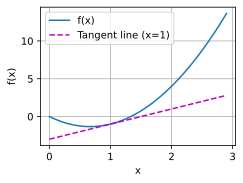

In [20]:
x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

<h3> Automatic Differentiation

In [21]:
import torch
x = torch.arange(4,8)
x

tensor([4, 5, 6, 7])

In [25]:
x = torch.arange(4.0, requires_grad=True)
# x.requires_grad_(True)
x.grad

In [26]:
y = 2 * torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

In [27]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [27]:
#reference
import torch
import torch.nn as nn
import torch.optim as optim

# 모델 정의
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.fc = nn.Linear(in_features=10, out_features=1)

    def forward(self, x):
        return self.fc(x)

# 데이터 및 모델 초기화
input_data = torch.randn((64, 10))  # 입력 데이터 예시
target = torch.randn((64, 1))       # 실제 레이블 예시

model = SimpleModel()

# 손실 함수 및 옵티마이저 정의
criterion = nn.MSELoss()  # 평균 제곱 오차
optimizer = optim.SGD(model.parameters(), lr=0.01)

# 훈련 과정
epochs = 10

for epoch in range(epochs):
    # Forward Pass
    output = model(input_data)

    # Loss 계산
    loss = criterion(output, target)

    # Backward Pass (역전파)
    optimizer.zero_grad()    # 그래디언트 초기화
    loss.backward()         # 역전파 실행

    # 옵티마이저 업데이트
    optimizer.step()

    # 훈련 중간에 손실 출력
    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item()}")

# 훈련이 완료된 모델을 사용하여 예측 등을 수행할 수 있습니다.
